# Random Walk Generation and Monte Carlo

In [40]:
import numpy as np
import pandas as pd
%matplotlib inline

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a geometric Browwnian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    # Calculates the returns (must convert to prices)
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # To prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [41]:
p = gbm(10, n_scenarios=3)

In [42]:
p.shape

(120, 3)

In [43]:
p.head()

,0,1,2
0,97.013993,101.631297,108.609580
1,97.379896,100.508414,110.836912
2,97.155320,104.113230,110.808519
3,93.377467,108.177436,110.288248
4,95.489774,102.750711,115.726514


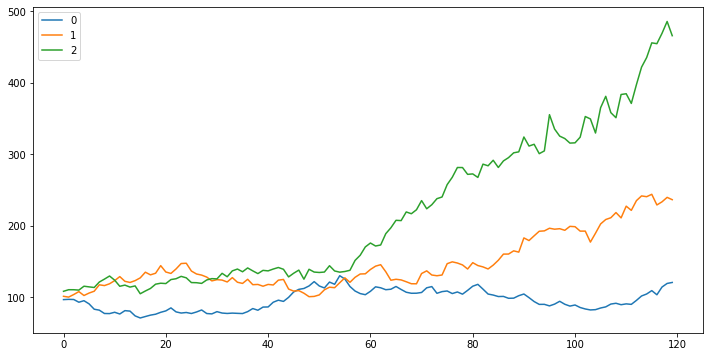

In [44]:
p.plot(figsize=(12,6))

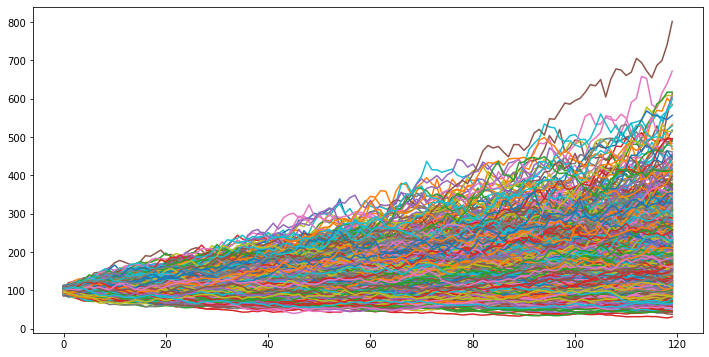

In [45]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [55]:
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a geometric Browwnian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    # Calculates the returns (must convert to prices)
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # To prices
    prices = s_0*(1+rets).cumprod()
    return prices
## Edit the fucntion so instead of producing the matrix xi and then scaling seperatly with sigma*np.sqrt(dt), we can compute both right
## off the bat when we originally produce xi
# In this version we are combining two instances in which we are looping through and reducing the instances (combine steps) 1 + rets
# and teh production of xi matrix (to then be scaled is another loop)
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a geometric Browwnian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [62]:
%timeit gbm0(n_years=5, n_scenarios=1000)

3.56 ms ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
%timeit gbm1(n_years=5, n_scenarios=1000)

3.07 ms ± 39 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


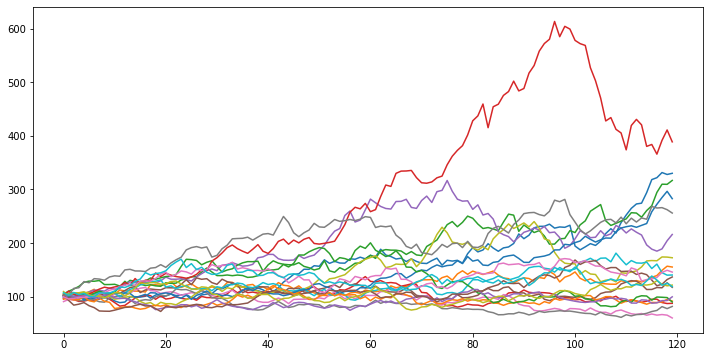

In [65]:
gbm(n_years=10, n_scenarios=20).plot(figsize=(12,6),legend=False)

In [66]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a geometric Browwnian Motion Model
    """ 
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

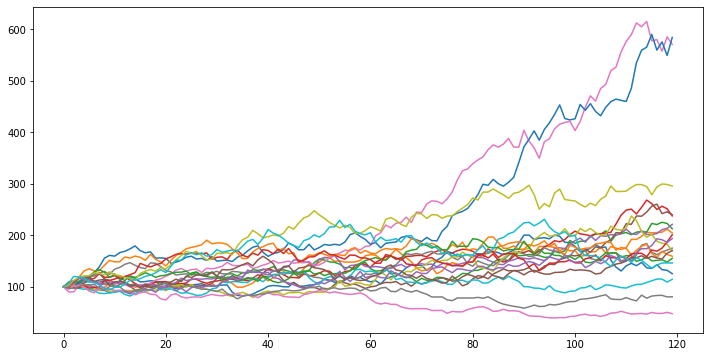

In [67]:
gbm(n_years=10, n_scenarios=20).plot(figsize=(12,6),legend=False)

In [68]:
gbm(n_years=10, n_scenarios=20).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,107.436211,103.300420,108.230555,96.822720,94.860261,94.997014,103.211702,101.975199,102.383718,104.991800,98.036344,103.611256,106.112113,105.090907,91.178170,101.613368,103.232421,108.294306,100.223082,100.653095
2,103.381813,99.450235,118.045433,103.420544,98.949966,98.727735,104.542746,107.085864,104.096970,108.227867,90.893505,104.830862,110.893602,104.025489,90.571781,110.112661,105.583858,104.133050,104.760557,101.051710
3,109.062386,94.154534,123.193376,104.370869,102.883165,100.532698,97.219139,102.514233,103.307595,110.768242,85.427727,102.383292,110.473000,104.657187,90.891856,101.830558,111.934842,102.288790,108.938547,96.795950
4,116.094876,99.144854,133.351226,103.651928,102.916087,104.120256,97.889299,103.895442,100.837831,108.916893,84.372820,106.865573,109.062024,105.807349,89.362503,101.057749,108.530021,102.241969,108.097774,104.742214
